# <center><span style="background-color: rgb(251, 160, 38); font-size: 32px;">  <b>NUCLIO DIGITAL SCHOOL -</b> MASTER EN DATA SCIENCE  </span></center>
    
<br>
    
<center><a href = https://nuclio.school/wp-content/uploads/2019/10/nucleoDS-newBlack.png > <img src="https://nuclio.school/wp-content/uploads/2019/10/nucleoDS-newBlack.png" width=400 height=100><a/></center>

<hr style="height:5px;border-width:0;color:orange;background-color:orange">
<center> <span style="font-size: 26px;"> Unupervised Learning Assignment </span> </center>

+ Session: **Unsupervised Learning Assignment**
+ Module: **Unsupervised Learning**
+ Course: **Data Science Master 0522**
+ Professor: **Christa Santos**

<br>

<hr style="height:5px;border-width:0;color:orange;background-color:orange">

## Recommendation Engines

Detail the problem statement here in your own words, and what is your role in the task.

...
...

#### Import Libraries

In [1]:
# silence warnings
import warnings
warnings.filterwarnings("ignore")

# operating system
import os

# time calculation to track some processes
import time

# numeric and matrix operations
import numpy as np
import pandas as pd

# scientific computations library
import scipy as sp

# loading ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

# import the function to compute cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

#### Import the data

In [2]:
articles = pd.read_csv("articles.csv")
articles.head()


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,110065011,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,12,Light Beige,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
2,111565001,111565,20 den 1p Stockings,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo..."
3,111586001,111586,Shape Up 30 den 1p Tights,273,Leggings/Tights,Garment Lower body,1010016,Solid,9,Black,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Tights with built-in support to lift the botto...
4,111593001,111593,Support 40 den 1p Tights,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny tights that shape the tummy, thighs..."


In [3]:
articles.shape

(28001, 25)

In [4]:
customers = pd.read_csv("customers.csv")
customers.head(10)


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,NaN,NaN,ACTIVE,NONE,20.0,fe7b8e2b3fafb89ca90db17ffeeae0fd29b795d803f749...
3,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,1.0,1.0,ACTIVE,Regularly,56.0,b31984b20a8c478de38eaf113c581ff64e63c4242e607b...
4,0000b2f1829e23b24feec422ef13df3ccedaedc85368e6...,1.0,1.0,ACTIVE,Regularly,54.0,ca8ca81e8b5794992144273b0eada83a7e09ec728c1093...
5,000172a9c322560c849754ffbdfdb2180d408aa7176b94...,NaN,NaN,ACTIVE,NONE,45.0,4ca377c955c160866d5662b33aa1af44d54d4342fb8bfa...
6,0001b0127d3e5ff8dadcfc6e5043682dba2070f2667081...,1.0,1.0,ACTIVE,Regularly,20.0,6b9f8c4d66cbfcbceda285582a97ba7ffa482ed930426e...
7,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,1.0,1.0,ACTIVE,Regularly,44.0,930b19ae7db8abb5a27f4da10217755a7305b4c452f5e0...
8,0001f8cef6b9702d54abf66fd89eb21014bf98567065a9...,NaN,NaN,ACTIVE,NONE,21.0,4211d6bf468de190b2f135feed96ed94b1c47f1d68991c...
9,0002cca4cc68601e894ab62839428e5f0696417fe0f9e8...,1.0,1.0,ACTIVE,Regularly,55.0,0bb723a1c843bf5ec45c0dc4deb04b285e0f704e2eb297...


In [5]:
customers.shape

(226120, 7)

In [6]:
transactions = pd.read_csv("transactions_train_final.csv")
transactions.head(10)


,Unnamed: 0,t_dat,customer_id,article_id,price,sales_channel_id
0,740,2018-09-20,03d0011487606c37c1b1ed147fc72f285a50c05f00b971...,668766002,0.042356,2
1,741,2018-09-20,03d0011487606c37c1b1ed147fc72f285a50c05f00b971...,652946001,0.050831,2
2,742,2018-09-20,03d0011487606c37c1b1ed147fc72f285a50c05f00b971...,691275008,0.067780,2
3,1260,2018-09-20,06d23b72cac134851a761473b40c881c300814981b6b0a...,657476001,0.016932,2
4,1261,2018-09-20,06d23b72cac134851a761473b40c881c300814981b6b0a...,685687003,0.016932,2
5,1262,2018-09-20,06d23b72cac134851a761473b40c881c300814981b6b0a...,685687003,0.016932,2
6,1263,2018-09-20,06d23b72cac134851a761473b40c881c300814981b6b0a...,680912006,0.016932,2
7,1264,2018-09-20,06d23b72cac134851a761473b40c881c300814981b6b0a...,652787001,0.033881,2
8,1265,2018-09-20,06d23b72cac134851a761473b40c881c300814981b6b0a...,668767002,0.016932,2
9,3250,2018-09-20,1320d4b3dd6481cde05bb80fb7ca37397f70470b9afb96...,501820043,0.016932,2


In [7]:
transactions.drop('Unnamed: 0', inplace=True, axis=1)
transactions

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,03d0011487606c37c1b1ed147fc72f285a50c05f00b971...,668766002,0.042356,2
1,2018-09-20,03d0011487606c37c1b1ed147fc72f285a50c05f00b971...,652946001,0.050831,2
2,2018-09-20,03d0011487606c37c1b1ed147fc72f285a50c05f00b971...,691275008,0.067780,2
3,2018-09-20,06d23b72cac134851a761473b40c881c300814981b6b0a...,657476001,0.016932,2
4,2018-09-20,06d23b72cac134851a761473b40c881c300814981b6b0a...,685687003,0.016932,2
...,...,...,...,...,...
85037,2020-09-22,e97c3a6c680cd3569df10f901a61fdffaf8f70300f6adf...,892857002,0.033102,1
85038,2020-09-22,e97c3a6c680cd3569df10f901a61fdffaf8f70300f6adf...,896064002,0.049627,1
85039,2020-09-22,e97c3a6c680cd3569df10f901a61fdffaf8f70300f6adf...,896064002,0.049627,1
85040,2020-09-22,f137c16fd175271922dad4006565503952f24750a57388...,752814020,0.033881,2


In [8]:
transactions.shape

(85042, 5)

## Exploratory Data Viz

In this section, I am exploring the data in order to investigate if the data needs any data cleaning or data transformation in order for the data to be used more efficiently.

## Artical_DB

In [9]:
def report_df(df, verbose = True):
    '''
    Makes a simple report on the supplied DataFrame.
    '''
    print(df.info(verbose = verbose))
    total_nulos = df.isnull().sum().sum()
    print()
    print(f"We have {total_nulos} nulls")

In [10]:
report_df(articles)

articles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28001 entries, 0 to 28000
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   article_id                    28001 non-null  int64 
 1   product_code                  28001 non-null  int64 
 2   prod_name                     28001 non-null  object
 3   product_type_no               28001 non-null  int64 
 4   product_type_name             28001 non-null  object
 5   product_group_name            28001 non-null  object
 6   graphical_appearance_no       28001 non-null  int64 
 7   graphical_appearance_name     28001 non-null  object
 8   colour_group_code             28001 non-null  int64 
 9   colour_group_name             28001 non-null  object
 10  perceived_colour_value_id     28001 non-null  int64 
 11  perceived_colour_value_name   28001 non-null  object
 12  perceived_colour_master_id    28001 non-null  int64 
 13  perceived_colour

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,110065011,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,12,Light Beige,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
2,111565001,111565,20 den 1p Stockings,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo..."
3,111586001,111586,Shape Up 30 den 1p Tights,273,Leggings/Tights,Garment Lower body,1010016,Solid,9,Black,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Tights with built-in support to lift the botto...
4,111593001,111593,Support 40 den 1p Tights,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny tights that shape the tummy, thighs..."


In [11]:
articles.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [12]:
list=['perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name',]
articles[list]

,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name
0,3,Light,9,White,1676,Jersey Basic
1,1,Dusty Light,11,Beige,1339,Clean Lingerie
2,4,Dark,5,Black,3608,Tights basic
3,4,Dark,5,Black,3608,Tights basic
4,4,Dark,5,Black,3608,Tights basic
...,...,...,...,...,...,...
27996,4,Dark,5,Black,3608,Tights basic
27997,2,Medium Dusty,1,Mole,1641,Jersey
27998,4,Dark,5,Black,7188,Socks Bin
27999,4,Dark,5,Black,1919,Jersey


we have 36 null values here that need to be cattered later

In [13]:
articles.isnull().sum()

article_id                       0
product_code                     0
prod_name                        0
product_type_no                  0
product_type_name                0
product_group_name               0
graphical_appearance_no          0
graphical_appearance_name        0
colour_group_code                0
colour_group_name                0
perceived_colour_value_id        0
perceived_colour_value_name      0
perceived_colour_master_id       0
perceived_colour_master_name     0
department_no                    0
department_name                  0
index_code                       0
index_name                       0
index_group_no                   0
index_group_name                 0
section_no                       0
section_name                     0
garment_group_no                 0
garment_group_name               0
detail_desc                     36
dtype: int64

No duplicates found

In [14]:
duplicate=articles[articles.duplicated()]
duplicate


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc


In [15]:
print(articles["product_group_name"].value_counts())



Garment Upper body       10568
Garment Lower body        5730
Garment Full body         3708
Accessories               2961
Underwear                 1590
Shoes                     1164
Swimwear                  1006
Socks & Tights             755
Nightwear                  357
Unknown                    105
Bags                        22
Items                       15
Cosmetic                     7
Garment and Shoe care        5
Underwear/nightwear          3
Stationery                   3
Fun                          2
Name: product_group_name, dtype: int64


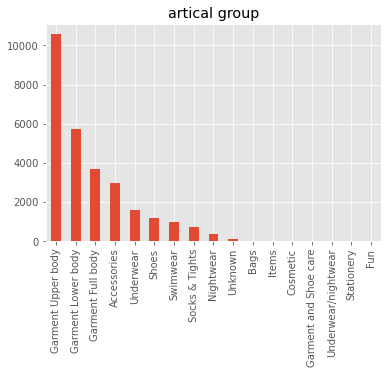

In [16]:
articles["product_group_name"].value_counts().plot(kind = "bar", title = "artical group");

In [17]:
print(articles["department_name"].value_counts())

Jersey                      1512
Trouser                     1109
Knitwear                     989
Blouse                       956
Swimwear                     915
                            ... 
Girls Local Relevance          1
Outdoor inactive from s1       1
Accessories Boys               1
Girls Projects                 1
Woven inactive from s1         1
Name: department_name, Length: 225, dtype: int64


In [18]:
print(articles["index_name"].value_counts())
print(articles["index_group_name"].value_counts())
print(articles["section_name"].value_counts())
print(articles["garment_group_name"].value_counts())

Ladieswear                        9056
Divided                           4784
Menswear                          3199
Lingeries/Tights                  2627
Ladies Accessories                2513
Children Sizes 92-140             1590
Baby Sizes 50-98                  1412
Children Sizes 134-170            1389
Sport                              881
Children Accessories, Swimwear     550
Name: index_name, dtype: int64
Ladieswear       14196
Baby/Children     4941
Divided           4784
Menswear          3199
Sport              881
Name: index_group_name, dtype: int64
Womens Everyday Collection        2740
Divided Collection                2341
Womens Tailoring                  1350
Womens Small accessories          1293
Womens Lingerie                   1220
Womens Casual                      940
Womens Trend                       877
Womens Swimwear, beachwear         861
Baby Essentials & Complements      798
Men Underwear                      788
H&M+                               74

no duplication in artical id

In [19]:
sum(articles["article_id"].value_counts() > 1)

0

## Customers_DB

In [20]:
report_df(customers)

customers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226120 entries, 0 to 226119
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   customer_id             226120 non-null  object 
 1   FN                      99570 non-null   float64
 2   Active                  98028 non-null   float64
 3   club_member_status      225778 non-null  object 
 4   fashion_news_frequency  225420 non-null  object 
 5   age                     225048 non-null  float64
 6   postal_code             226120 non-null  object 
dtypes: float64(3), object(4)
memory usage: 12.1+ MB
None

We have 256756 nulls


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,NaN,NaN,ACTIVE,NONE,20.0,fe7b8e2b3fafb89ca90db17ffeeae0fd29b795d803f749...
3,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,1.0,1.0,ACTIVE,Regularly,56.0,b31984b20a8c478de38eaf113c581ff64e63c4242e607b...
4,0000b2f1829e23b24feec422ef13df3ccedaedc85368e6...,1.0,1.0,ACTIVE,Regularly,54.0,ca8ca81e8b5794992144273b0eada83a7e09ec728c1093...


In [21]:
print(customers['fashion_news_frequency'].value_counts())
print(customers['club_member_status'].value_counts())
print(customers['FN'].value_counts())
print(customers['Active'].value_counts())


NONE         125608
Regularly     99757
Monthly          55
Name: fashion_news_frequency, dtype: int64
ACTIVE        222595
PRE-CREATE      3160
LEFT CLUB         23
Name: club_member_status, dtype: int64
1.0    99570
Name: FN, dtype: int64
1.0    98028
Name: Active, dtype: int64


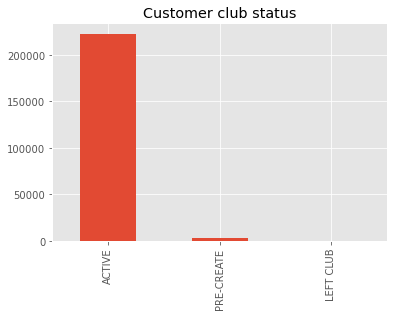

In [22]:
customers["club_member_status"].value_counts().plot(kind = "bar", title = "Customer club status");

we have quite some nan values here 

In [23]:
customers.isnull().sum()

customer_id                    0
FN                        126550
Active                    128092
club_member_status           342
fashion_news_frequency       700
age                         1072
postal_code                    0
dtype: int64

No duplicate found

In [24]:
duplicate=customers[customers.duplicated()]
duplicate

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code


## transactions_DB

This sj=hows that there is no null values

In [25]:
report_df(transactions)

transactions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85042 entries, 0 to 85041
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   t_dat             85042 non-null  object 
 1   customer_id       85042 non-null  object 
 2   article_id        85042 non-null  int64  
 3   price             85042 non-null  float64
 4   sales_channel_id  85042 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 3.2+ MB
None

We have 0 nulls


,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,03d0011487606c37c1b1ed147fc72f285a50c05f00b971...,668766002,0.042356,2
1,2018-09-20,03d0011487606c37c1b1ed147fc72f285a50c05f00b971...,652946001,0.050831,2
2,2018-09-20,03d0011487606c37c1b1ed147fc72f285a50c05f00b971...,691275008,0.067780,2
3,2018-09-20,06d23b72cac134851a761473b40c881c300814981b6b0a...,657476001,0.016932,2
4,2018-09-20,06d23b72cac134851a761473b40c881c300814981b6b0a...,685687003,0.016932,2


In [26]:
print(transactions['sales_channel_id'].value_counts())


2    78876
1     6166
Name: sales_channel_id, dtype: int64


there are duplicats so we wil like to remove them

In [27]:

duplicate=transactions[transactions.duplicated()]
duplicate

,t_dat,customer_id,article_id,price,sales_channel_id
5,2018-09-20,06d23b72cac134851a761473b40c881c300814981b6b0a...,685687003,0.016932,2
10,2018-09-20,1320d4b3dd6481cde05bb80fb7ca37397f70470b9afb96...,501820043,0.016932,2
12,2018-09-20,1320d4b3dd6481cde05bb80fb7ca37397f70470b9afb96...,501820045,0.016932,2
14,2018-09-20,1320d4b3dd6481cde05bb80fb7ca37397f70470b9afb96...,501820042,0.016932,2
42,2018-09-20,a8d14751a68b4cab69fed60b169c03c5d62f1c8b73fb1c...,572124001,0.040661,2
...,...,...,...,...,...
85024,2020-09-22,e55d5ddb3a0c3fb1b4df8edbf526ba12989ab2a852c727...,898694002,0.050831,2
85028,2020-09-22,e55d5ddb3a0c3fb1b4df8edbf526ba12989ab2a852c727...,878190003,0.067780,2
85032,2020-09-22,e55d5ddb3a0c3fb1b4df8edbf526ba12989ab2a852c727...,788575004,0.042356,2
85033,2020-09-22,e55d5ddb3a0c3fb1b4df8edbf526ba12989ab2a852c727...,788575004,0.042356,2


#### Data Cleaning

In this section, I am cleaning the data to make it more suitable for the task.

### Articles data cleaning


In [28]:
print(articles['detail_desc'].dtype)
articles['detail_desc'].fillna(value='Null',inplace=True)      
articles [articles['detail_desc'].isnull()]

object


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc


### Customers data cleaning

In [29]:
customers.isnull().sum()

customer_id                    0
FN                        126550
Active                    128092
club_member_status           342
fashion_news_frequency       700
age                         1072
postal_code                    0
dtype: int64

we will be filling nan values with appropriate values

In [30]:
print(customers['FN'].dtype)
print(customers['FN'].unique())
customers['FN'].fillna(value=0,inplace=True)   
print(customers['FN'].unique())



float64
[nan  1.]
[0. 1.]


In [31]:
print(customers['Active'].dtype)
print(customers['Active'].unique())
customers['Active'].fillna(value=0,inplace=True)   
print(customers['Active'].unique())

float64
[nan  1.]
[0. 1.]


In [32]:
print(customers['club_member_status'].dtype)
print(customers['club_member_status'].unique())
customers['club_member_status'].fillna(value='Unknown',inplace=True)   
print(customers['club_member_status'].unique())

object
['ACTIVE' 'PRE-CREATE' nan 'LEFT CLUB']
['ACTIVE' 'PRE-CREATE' 'Unknown' 'LEFT CLUB']


In [33]:
print(customers['fashion_news_frequency'].dtype)
print(customers['fashion_news_frequency'].unique())
customers['fashion_news_frequency'].fillna(value='Unknown',inplace=True)   
print(customers['fashion_news_frequency'].unique())

object
['NONE' 'Regularly' nan 'Monthly']
['NONE' 'Regularly' 'Unknown' 'Monthly']


In [34]:
print(customers['age'].dtype)
print(customers['age'].unique())
customers['age'].fillna(value=0,inplace=True)   
print(customers['age'].unique())

float64
[49. 24. 20. 56. 54. 45. 44. 21. 55. 27. 33. 50. 29. 25. 79. 59. 19. 17.
 36. 40. 23. 22. 39. 32. 51. 28. 41. 37. 42. 18. 43. 30. 53. 71. 58. 26.
 57. 46. 52. 47. 38. 48. 34. 67. 60. 31. 65. 64. nan 68. 62. 61. 63. 70.
 35. 73. 66. 80. 85. 75. 69. 82. 77. 72. 74. 76. 98. 78. 16. 84. 83. 88.
 81. 86. 99. 91. 90. 92. 95. 94. 96. 89.]
[49. 24. 20. 56. 54. 45. 44. 21. 55. 27. 33. 50. 29. 25. 79. 59. 19. 17.
 36. 40. 23. 22. 39. 32. 51. 28. 41. 37. 42. 18. 43. 30. 53. 71. 58. 26.
 57. 46. 52. 47. 38. 48. 34. 67. 60. 31. 65. 64.  0. 68. 62. 61. 63. 70.
 35. 73. 66. 80. 85. 75. 69. 82. 77. 72. 74. 76. 98. 78. 16. 84. 83. 88.
 81. 86. 99. 91. 90. 92. 95. 94. 96. 89.]


### Transaction data cleaning

we will be droping the duplicate values

In [35]:
transactions.drop_duplicates(keep='first', inplace=True)
duplicate=transactions[transactions.duplicated()]
duplicate

,t_dat,customer_id,article_id,price,sales_channel_id


## Data Transformation

In this section, I am transformation the data to make it more suitable for the task.

In [36]:
print(transactions.columns)
print(transactions.shape)
print(customers.columns)
print(customers.shape)

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id'], dtype='object')
(74686, 5)
Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')
(226120, 7)


we will murge the data set sto get one unique data frame

In [37]:
df=pd.merge(transactions,customers, on ='customer_id')
df

,t_dat,customer_id,article_id,price,sales_channel_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,2018-09-20,03d0011487606c37c1b1ed147fc72f285a50c05f00b971...,668766002,0.042356,2,1.0,1.0,ACTIVE,Regularly,51.0,8db52856d17c197683efbc9d5ef2dc873aaf7062486b2d...
1,2018-09-20,03d0011487606c37c1b1ed147fc72f285a50c05f00b971...,652946001,0.050831,2,1.0,1.0,ACTIVE,Regularly,51.0,8db52856d17c197683efbc9d5ef2dc873aaf7062486b2d...
2,2018-09-20,03d0011487606c37c1b1ed147fc72f285a50c05f00b971...,691275008,0.067780,2,1.0,1.0,ACTIVE,Regularly,51.0,8db52856d17c197683efbc9d5ef2dc873aaf7062486b2d...
3,2018-09-22,03d0011487606c37c1b1ed147fc72f285a50c05f00b971...,655434003,0.101678,2,1.0,1.0,ACTIVE,Regularly,51.0,8db52856d17c197683efbc9d5ef2dc873aaf7062486b2d...
4,2018-09-25,03d0011487606c37c1b1ed147fc72f285a50c05f00b971...,679977002,0.118627,2,1.0,1.0,ACTIVE,Regularly,51.0,8db52856d17c197683efbc9d5ef2dc873aaf7062486b2d...
...,...,...,...,...,...,...,...,...,...,...,...
70792,2020-09-21,b637a3e7d8b0caa947aaefd609b8d84a9ee962cf0a52a5...,822115004,0.025407,2,1.0,1.0,ACTIVE,Regularly,43.0,ca6a33d3e52bd841e4be573a123ae2bcff3e6af65cc67a...
70793,2020-09-21,b637a3e7d8b0caa947aaefd609b8d84a9ee962cf0a52a5...,918890001,0.025407,2,1.0,1.0,ACTIVE,Regularly,43.0,ca6a33d3e52bd841e4be573a123ae2bcff3e6af65cc67a...
70794,2020-09-21,b637a3e7d8b0caa947aaefd609b8d84a9ee962cf0a52a5...,857163002,0.013542,2,1.0,1.0,ACTIVE,Regularly,43.0,ca6a33d3e52bd841e4be573a123ae2bcff3e6af65cc67a...
70795,2020-09-21,b637a3e7d8b0caa947aaefd609b8d84a9ee962cf0a52a5...,918890002,0.025407,2,1.0,1.0,ACTIVE,Regularly,43.0,ca6a33d3e52bd841e4be573a123ae2bcff3e6af65cc67a...


In [38]:
df.isnull().sum()

t_dat                     0
customer_id               0
article_id                0
price                     0
sales_channel_id          0
FN                        0
Active                    0
club_member_status        0
fashion_news_frequency    0
age                       0
postal_code               0
dtype: int64

In [39]:
print(df.columns)
print(df.shape)
print(articles.columns)
print(articles.shape)

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id', 'FN',
       'Active', 'club_member_status', 'fashion_news_frequency', 'age',
       'postal_code'],
      dtype='object')
(70797, 11)
Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')
(28001, 25)


In [40]:
df_final=pd.merge(df,articles , on ='article_id')
df_final

,t_dat,customer_id,article_id,price,sales_channel_id,FN,Active,club_member_status,fashion_news_frequency,age,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,2018-09-25,03d0011487606c37c1b1ed147fc72f285a50c05f00b971...,679977002,0.118627,2,1.0,1.0,ACTIVE,Regularly,51.0,...,Outwear & Blazers,A,Ladieswear,1,Ladieswear,18,Womens Trend,1008,Dressed,Null
1,2019-03-05,8a9d4d7e454a745d3ac77645ca8afd7123b1f3d5d4e4bf...,679977002,0.067780,2,1.0,1.0,ACTIVE,Regularly,50.0,...,Outwear & Blazers,A,Ladieswear,1,Ladieswear,18,Womens Trend,1008,Dressed,Null
2,2018-10-11,03d0011487606c37c1b1ed147fc72f285a50c05f00b971...,108775044,0.008458,2,1.0,1.0,ACTIVE,Regularly,51.0,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,2018-09-26,7f0ac4394297dc4a885d3b9277ba526cbbfbf7fb7cae46...,108775044,0.008458,2,1.0,1.0,ACTIVE,Regularly,33.0,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
4,2018-12-30,8d181a2a9f5d787554c95275304965fbf33edb9ee7b1f4...,108775044,0.007627,2,0.0,0.0,ACTIVE,NONE,32.0,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34719,2020-09-07,b637a3e7d8b0caa947aaefd609b8d84a9ee962cf0a52a5...,916058001,0.033881,2,1.0,1.0,ACTIVE,Regularly,43.0,...,Basic 1,D,Divided,2,Divided,51,Divided Basics,1002,Jersey Basic,Oversized joggers in sweatshirt fabric with a ...
34720,2020-09-07,b637a3e7d8b0caa947aaefd609b8d84a9ee962cf0a52a5...,914293003,0.067780,2,1.0,1.0,ACTIVE,Regularly,43.0,...,Outwear,A,Ladieswear,1,Ladieswear,19,Womens Jackets,1007,Outdoor,"Lightly padded, quilted jacket in a woven cott..."
34721,2020-09-08,b637a3e7d8b0caa947aaefd609b8d84a9ee962cf0a52a5...,854767001,0.050831,2,1.0,1.0,ACTIVE,Regularly,43.0,...,Knitwear,A,Ladieswear,1,Ladieswear,2,H&M+,1003,Knitwear,Wide jumper in a soft knit containing some woo...
34722,2020-09-20,b637a3e7d8b0caa947aaefd609b8d84a9ee962cf0a52a5...,905757001,0.084729,2,1.0,1.0,ACTIVE,Regularly,43.0,...,Blouse & Dress,A,Ladieswear,1,Ladieswear,18,Womens Trend,1010,Blouses,Knee-length tunic in crisp cotton poplin with ...


In [41]:
df_final.isnull().sum()

t_dat                           0
customer_id                     0
article_id                      0
price                           0
sales_channel_id                0
FN                              0
Active                          0
club_member_status              0
fashion_news_frequency          0
age                             0
postal_code                     0
product_code                    0
prod_name                       0
product_type_no                 0
product_type_name               0
product_group_name              0
graphical_appearance_no         0
graphical_appearance_name       0
colour_group_code               0
colour_group_name               0
perceived_colour_value_id       0
perceived_colour_value_name     0
perceived_colour_master_id      0
perceived_colour_master_name    0
department_no                   0
department_name                 0
index_code                      0
index_name                      0
index_group_no                  0
index_group_na

In [42]:
df_final.dtypes

t_dat                            object
customer_id                      object
article_id                        int64
price                           float64
sales_channel_id                  int64
FN                              float64
Active                          float64
club_member_status               object
fashion_news_frequency           object
age                             float64
postal_code                      object
product_code                      int64
prod_name                        object
product_type_no                   int64
product_type_name                object
product_group_name               object
graphical_appearance_no           int64
graphical_appearance_name        object
colour_group_code                 int64
colour_group_name                object
perceived_colour_value_id         int64
perceived_colour_value_name      object
perceived_colour_master_id        int64
perceived_colour_master_name     object
department_no                     int64


In [43]:
df_final.select_dtypes(include='int64').isnull().sum()


article_id                    0
sales_channel_id              0
product_code                  0
product_type_no               0
graphical_appearance_no       0
colour_group_code             0
perceived_colour_value_id     0
perceived_colour_master_id    0
department_no                 0
index_group_no                0
section_no                    0
garment_group_no              0
dtype: int64

In [44]:
df_final.select_dtypes(include='float64').isnull().sum()

price     0
FN        0
Active    0
age       0
dtype: int64

In [45]:

# float=['FN',
# 'Active',
# 'age',
# 'product_code',
# 'product_type_no',
# 'graphical_appearance_no',
# 'colour_group_code',
# 'perceived_colour_value_id',
# 'perceived_colour_master_id',
# 'department_no',
# 'index_group_no',
# 'section_no',
# 'garment_group_no']
# for a in float :
#     df_final[a].fillna(value=0.0, inplace=True)

# df_final.select_dtypes(include='float64').isnull().sum()

In [46]:
#df_final.select_dtypes(include='object').isnull().sum()

In [47]:
# object=['club_member_status',
# 'fashion_news_frequency',
# 'postal_code',
# 'prod_name',
# 'product_type_name',
# 'product_group_name',
# 'graphical_appearance_name',
# 'colour_group_name',
# 'perceived_colour_value_name',
# 'perceived_colour_master_name',
# 'department_name',
# 'index_code',
# 'index_name',
# 'index_group_name',
# 'section_name',
# 'garment_group_name',
# 'detail_desc']F
#     df_final[a].fillna(value='Unknown', inplace=True)
# df_final.select_dtypes(include='object').isnull().sum()

In [48]:
df_final.head()

,t_dat,customer_id,article_id,price,sales_channel_id,FN,Active,club_member_status,fashion_news_frequency,age,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,2018-09-25,03d0011487606c37c1b1ed147fc72f285a50c05f00b971...,679977002,0.118627,2,1.0,1.0,ACTIVE,Regularly,51.0,...,Outwear & Blazers,A,Ladieswear,1,Ladieswear,18,Womens Trend,1008,Dressed,Null
1,2019-03-05,8a9d4d7e454a745d3ac77645ca8afd7123b1f3d5d4e4bf...,679977002,0.067780,2,1.0,1.0,ACTIVE,Regularly,50.0,...,Outwear & Blazers,A,Ladieswear,1,Ladieswear,18,Womens Trend,1008,Dressed,Null
2,2018-10-11,03d0011487606c37c1b1ed147fc72f285a50c05f00b971...,108775044,0.008458,2,1.0,1.0,ACTIVE,Regularly,51.0,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,2018-09-26,7f0ac4394297dc4a885d3b9277ba526cbbfbf7fb7cae46...,108775044,0.008458,2,1.0,1.0,ACTIVE,Regularly,33.0,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
4,2018-12-30,8d181a2a9f5d787554c95275304965fbf33edb9ee7b1f4...,108775044,0.007627,2,0.0,0.0,ACTIVE,NONE,32.0,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [49]:
df_final.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id', 'FN',
       'Active', 'club_member_status', 'fashion_news_frequency', 'age',
       'postal_code', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

popularity by different catagories

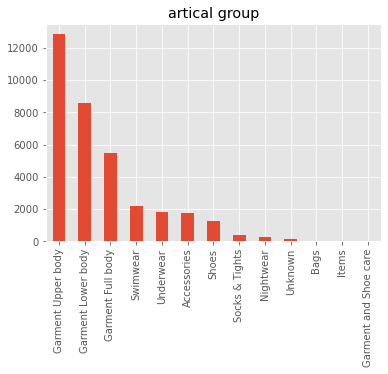

In [50]:
df_final["product_group_name"].value_counts().plot(kind = "bar", title = "artical group");

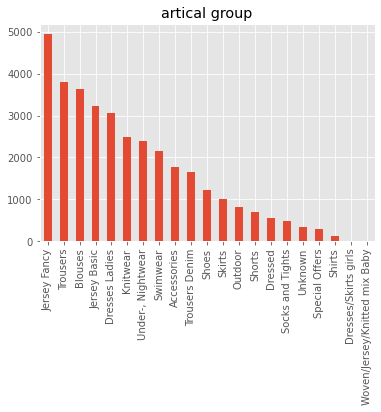

In [51]:
df_final["garment_group_name"].value_counts().plot(kind = "bar", title = "artical group");

In [52]:
# from sklearn.preprocessing import MinMaxScaler

# mms = MinMaxScaler()

# df_final['product_code'] = mms.fit_transform(df['product_code'])

In [53]:
df_final=df_final.pivot_table(index = "customer_id", columns = "article_id", values = "product_code")
df_final

article_id,108775044,110065011,111565001,111586001,111593001,111609001,123173001,126589010,129085001,129085026,...,946748004,946763001,946764003,946795001,947509001,947934001,949551001,949551002,952267001,956217002
customer_id,,,,,,,,,,,,,,,,,,,,,
0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37e011580a479e80aa94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296,108775.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0bf4c6fd4e9d33f9bfb807bb78348cbf5c565846ff4006acf5c1b9aea77b0e54,NaN,NaN,NaN,NaN,NaN,111609.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0d4fb6fb46dfe2759bcf7bc80340e8915b207aa2f74b5b3c76f74d3ce28359e8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13195d22b61b4c7de21818aae143713deb7be4b69ef4df955b10451699ac590f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
efaafb08a00e63ce561a67c31c1ab7e720d4f394a78c4705518dc02084a29172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f137c16fd175271922dad4006565503952f24750a57388fe24970a218c62de6a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,946763.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f444c8b2fe23f1b9b709c198ed641519bfa368f6050c824c09abe3c61e0c8d8a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126589.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,949551.0,949551.0,NaN,NaN


In [54]:
df_final.isnull().sum()

article_id
108775044    87
110065011    90
111565001    92
111586001    92
111593001    89
             ..
947934001    93
949551001    93
949551002    93
952267001    93
956217002    92
Length: 12670, dtype: int64

filling the nan values

In [55]:
VALUE_TO_IMPUTE=0
if VALUE_TO_IMPUTE != "MEAN":
    df_final.fillna(VALUE_TO_IMPUTE, inplace = True)

elif VALUE_TO_IMPUTE == "MEAN":
    imputer = SimpleImputer(strategy = "mean")
    X_imputed = imputer.fit_transform(df_final)
    df_final = pd.DataFrame(X_imputed, index = df_final.index, columns = df_final.columns)
df_final

article_id,108775044,110065011,111565001,111586001,111593001,111609001,123173001,126589010,129085001,129085026,...,946748004,946763001,946764003,946795001,947509001,947934001,949551001,949551002,952267001,956217002
customer_id,,,,,,,,,,,,,,,,,,,,,
0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37e011580a479e80aa94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296,108775.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0bf4c6fd4e9d33f9bfb807bb78348cbf5c565846ff4006acf5c1b9aea77b0e54,0.0,0.0,0.0,0.0,0.0,111609.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0d4fb6fb46dfe2759bcf7bc80340e8915b207aa2f74b5b3c76f74d3ce28359e8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13195d22b61b4c7de21818aae143713deb7be4b69ef4df955b10451699ac590f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
efaafb08a00e63ce561a67c31c1ab7e720d4f394a78c4705518dc02084a29172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f137c16fd175271922dad4006565503952f24750a57388fe24970a218c62de6a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,946763.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f444c8b2fe23f1b9b709c198ed641519bfa368f6050c824c09abe3c61e0c8d8a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126589.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,949551.0,949551.0,0.0,0.0


 Dimensionality Reduction with PCA

In [56]:
st = time.time()
pca = PCA(n_components = 30)
pca.fit(df_final)
pca_samples = pca.transform(df_final)
et = time.time()
print("Total PCA took {} minutes".format(round((et - st)/60, 2)))

Total PCA took 0.01 minutes


In [57]:
pca.explained_variance_ratio_

array([0.0235968 , 0.02102859, 0.02081523, 0.01904475, 0.01810297,
       0.01717355, 0.01662231, 0.01612998, 0.01544394, 0.01498612,
       0.01466975, 0.01445993, 0.01425627, 0.01397836, 0.01371641,
       0.01344082, 0.01332901, 0.01324979, 0.0130488 , 0.01285216,
       0.01256323, 0.01246569, 0.01213743, 0.0120505 , 0.01197312,
       0.01178938, 0.0116388 , 0.01158463, 0.01149586, 0.01136069])

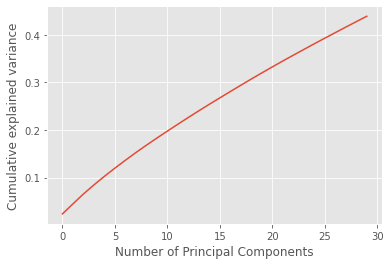

In [58]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative explained variance');

In [59]:
pca_df = pd.DataFrame(pca_samples[:, 0:20])
pca_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,135430.222246,-3.718542e+05,4.134230e+05,-65964.224729,-1.730696e+05,-2.883968e+05,-2.805263e+05,-1.108693e+06,1.699997e+05,1.318686e+05,-5.610277e+05,-8.661655e+05,5.433514e+05,-9.872347e+05,-8.092221e+05,2.297993e+04,-5.068228e+05,-1.909343e+05,4.039944e+05,3.671587e+05
1,-513452.003227,-4.082958e+05,1.175666e+06,668335.480365,9.576658e+05,4.397032e+05,1.232967e+06,-6.913555e+05,-7.544377e+05,1.580366e+06,-2.858348e+06,-1.940622e+06,1.785037e+06,-4.439280e+06,8.275882e+05,-1.919319e+06,8.210422e+06,-3.748011e+06,2.344987e+06,-3.547001e+05
2,-442143.124233,-8.613752e+05,-4.364923e+05,247615.693374,-9.515521e+05,-4.482359e+03,-3.883664e+05,-1.458700e+06,4.348686e+05,2.950512e+05,6.345029e+05,1.357133e+06,1.080706e+06,2.927037e+05,2.930668e+05,9.439873e+05,2.353115e+05,-7.494202e+05,-3.354608e+05,-3.971456e+05
3,916839.551374,-1.018376e+06,1.173857e+06,-273866.952831,-1.012336e+06,6.979683e+05,1.699523e+04,1.493101e+05,-2.053729e+06,-3.275647e+05,-1.724977e+06,-5.677148e+06,-3.297774e+05,-2.846527e+06,-9.360293e+05,-8.917259e+05,2.736439e+05,-1.334978e+06,2.299012e+06,-3.661285e+06
4,30738.697340,-7.080657e+04,-4.266786e+05,-185574.439101,-1.415183e+05,1.116478e+06,6.485213e+05,-1.297160e+06,1.057547e+06,-2.793216e+05,2.789095e+05,-5.451306e+05,-4.793088e+05,1.109240e+06,-9.961922e+05,5.249243e+05,4.320283e+05,6.511146e+04,1.184981e+06,-9.386294e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,-118854.709888,-1.078765e+06,-5.474396e+04,499820.625756,-4.315810e+05,-3.648506e+04,1.256213e+05,-6.547005e+05,2.976242e+05,-1.808266e+05,6.626183e+05,-3.225140e+05,7.145626e+04,-5.295754e+05,6.141992e+05,2.898421e+04,-3.414159e+04,2.937057e+05,2.734838e+05,-7.542529e+05
90,-816369.062758,2.500449e+05,1.102704e+06,418421.300039,-2.333193e+06,-1.260441e+06,1.008964e+06,-1.943707e+06,2.654234e+06,1.882224e+06,6.650108e+04,3.832256e+06,1.392330e+06,-2.252328e+06,6.210897e+06,4.944756e+06,8.178698e+05,2.017623e+06,3.224133e+05,-1.694839e+06
91,-272226.825274,-4.733062e+05,-7.968405e+04,-268039.666061,-5.014650e+05,4.529072e+05,-4.891354e+05,5.332514e+03,-2.442362e+05,2.296534e+05,-7.590276e+04,9.950758e+04,1.357289e+05,-4.424680e+05,1.897320e+05,-1.139650e+06,-3.219536e+05,-3.720314e+05,-2.152623e+05,-3.127507e+05
92,-379990.762739,-6.786152e+05,-3.325791e+05,71927.629958,-4.214655e+05,2.897592e+05,-3.887484e+05,-4.994080e+05,4.026592e+05,2.192074e+05,1.158946e+05,8.793741e+04,3.190169e+05,-2.312760e+05,-3.493881e+05,8.983627e+04,4.291895e+05,3.293693e+04,2.741076e+05,-1.877063e+05


In [60]:
pca = PCA(n_components = 0.6)
kmeans = KMeans(n_clusters=10)
kmeans.fit(pca_df)
kmeans_results = kmeans.predict(pca_df)
kmeans_results


array([5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 1,
       8, 5, 5, 1, 5, 5, 5, 5, 1, 3, 5, 5, 5, 0, 0, 5, 0, 5, 5, 0, 0, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 4,
       6, 5, 5, 9, 5, 5, 7, 5, 5, 5, 1, 5, 2, 5, 5, 1, 5, 5, 5, 5, 0, 0,
       1, 5, 1, 5, 5, 5])

In [61]:
df_final.reset_index()

article_id,customer_id,108775044,110065011,111565001,111586001,111593001,111609001,123173001,126589010,129085001,...,946748004,946763001,946764003,946795001,947509001,947934001,949551001,949551002,952267001,956217002
0,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,03d0011487606c37c1b1ed147fc72f285a50c05f00b971...,108775.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0bf4c6fd4e9d33f9bfb807bb78348cbf5c565846ff4006...,0.0,0.0,0.0,0.0,0.0,111609.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0d4fb6fb46dfe2759bcf7bc80340e8915b207aa2f74b5b...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13195d22b61b4c7de21818aae143713deb7be4b69ef4df...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,efaafb08a00e63ce561a67c31c1ab7e720d4f394a78c47...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,f137c16fd175271922dad4006565503952f24750a57388...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,946763.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,f444c8b2fe23f1b9b709c198ed641519bfa368f6050c82...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126589.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,949551.0,949551.0,0.0,0.0
92,f73f63f12d2c6947e21f28dfe13a70fe117703aa61c0f3...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
A=pd.DataFrame(kmeans_results, columns=['clusters'])
A

,clusters
0,5
1,5
2,5
3,5
4,5
...,...
89,5
90,1
91,5
92,5


In [63]:
A=A.set_axis([df_final.index])
A

,clusters
customer_id,
0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37e011580a479e80aa94,5
03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296,5
0bf4c6fd4e9d33f9bfb807bb78348cbf5c565846ff4006acf5c1b9aea77b0e54,5
0d4fb6fb46dfe2759bcf7bc80340e8915b207aa2f74b5b3c76f74d3ce28359e8,5
13195d22b61b4c7de21818aae143713deb7be4b69ef4df955b10451699ac590f,5
...,...
efaafb08a00e63ce561a67c31c1ab7e720d4f394a78c4705518dc02084a29172,5
f137c16fd175271922dad4006565503952f24750a57388fe24970a218c62de6a,1
f444c8b2fe23f1b9b709c198ed641519bfa368f6050c824c09abe3c61e0c8d8a,5


In [64]:
df_final

article_id,108775044,110065011,111565001,111586001,111593001,111609001,123173001,126589010,129085001,129085026,...,946748004,946763001,946764003,946795001,947509001,947934001,949551001,949551002,952267001,956217002
customer_id,,,,,,,,,,,,,,,,,,,,,
0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37e011580a479e80aa94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296,108775.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0bf4c6fd4e9d33f9bfb807bb78348cbf5c565846ff4006acf5c1b9aea77b0e54,0.0,0.0,0.0,0.0,0.0,111609.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0d4fb6fb46dfe2759bcf7bc80340e8915b207aa2f74b5b3c76f74d3ce28359e8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13195d22b61b4c7de21818aae143713deb7be4b69ef4df955b10451699ac590f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
efaafb08a00e63ce561a67c31c1ab7e720d4f394a78c4705518dc02084a29172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f137c16fd175271922dad4006565503952f24750a57388fe24970a218c62de6a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,946763.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f444c8b2fe23f1b9b709c198ed641519bfa368f6050c824c09abe3c61e0c8d8a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126589.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,949551.0,949551.0,0.0,0.0


In [65]:
# #this code is for some reason not working due to which it causes problem in the future results
# df_final['clusters'] = pd.DataFrame(kmeans_results)
# df_final


## Collaborative Filtering

### Calulating similarity

In [66]:
CALCULATE_SIMILARITY = True

In [67]:
if CALCULATE_SIMILARITY:

    st = time.time()
    df_final_norm = df_final.apply(lambda x: (x - np.mean(x))/(np.max(x) - np.min(x)), axis = 1)
    et = time.time()
    print("Normalization took {} minutes".format(round((et - st)/60, 2)))

    df_final_norm = df_final_norm
    sparse_ratings = sp.sparse.csr_matrix(df_final_norm.values)

    st = time.time()
    
    item_similarity = cosine_similarity(sparse_ratings.T)
    item_sim_df = pd.DataFrame(item_similarity, index = df_final_norm.columns, columns = df_final_norm.columns)
    item_sim_df.to_pickle(os.path.join("item_similarity.pkl"))

    user_similarity = cosine_similarity(sparse_ratings)
    user_sim_df = pd.DataFrame(user_similarity, index = df_final_norm.index, columns = df_final_norm.index)
    user_sim_df.to_pickle(os.path.join("user_similarity.pkl"))
    
    et = time.time()
    print("Total time to calculate similarity took {} minutes.".format(round((et - st)/60, 2)))
    
else:
    user_sim_df = pd.read_pickle(os.path.join("user_similarity.pkl"))
    item_sim_df = pd.read_pickle(os.path.join("item_similarity.pkl"))

Normalization took 0.0 minutes
Total time to calculate similarity took 1.2 minutes.


In [68]:
user_sim_df

customer_id,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37e011580a479e80aa94,03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296,0bf4c6fd4e9d33f9bfb807bb78348cbf5c565846ff4006acf5c1b9aea77b0e54,0d4fb6fb46dfe2759bcf7bc80340e8915b207aa2f74b5b3c76f74d3ce28359e8,13195d22b61b4c7de21818aae143713deb7be4b69ef4df955b10451699ac590f,1320d4b3dd6481cde05bb80fb7ca37397f70470b9afb96aeca5d41175acaf836,157eee38676eebb003bf97407f26e369de192997ab3902c194ce2690f060ff50,191071b0e1f2e94a557f1a0b4cea3de55faf1581b1f46466ffe90664f73ec96e,1a8ff5bca9a06d93488b597eaba364f4d96d936a3c96b6c6d696a5445b7dbec0,1df07f916d7f648458702bd0b612caee88f1fb4cd1b660fc79ca0c99d27b1293,...,e5ebe09835a61c34decfeba6b5331ea241d80184802acd6f5de65ba87b12f36f,e75142fdce4e1428b71f019ca653974ede3fca72bf565cbade1806aadd5742a1,e7c0ff2f724293c09bf3ba498c8c49b001040374fab1cdf2d6fe6017de089eba,e97c3a6c680cd3569df10f901a61fdffaf8f70300f6adf6e266b80c87d54245a,e9c585d9ad62a63b40d19ed5b0d9fca97e840c38b8ab2b3c5f6d66e60620c18c,efaafb08a00e63ce561a67c31c1ab7e720d4f394a78c4705518dc02084a29172,f137c16fd175271922dad4006565503952f24750a57388fe24970a218c62de6a,f444c8b2fe23f1b9b709c198ed641519bfa368f6050c824c09abe3c61e0c8d8a,f73f63f12d2c6947e21f28dfe13a70fe117703aa61c0f3f538bbd790cee93bfd,ffc247b933f175b37fccbb4f71c0479d6625e703b36f637be643afc224a8977f
customer_id,,,,,,,,,,,,,,,,,,,,,
0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37e011580a479e80aa94,1.000000,0.020318,-0.015172,0.038453,0.019784,0.030573,0.001293,0.000515,-0.005940,-0.007355,...,-0.003227,-0.006235,0.004343,0.003207,-0.010659,-0.000638,0.004270,-0.003355,-0.000054,-0.019238
03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296,0.020318,1.000000,-0.014496,0.009945,0.012167,-0.003439,-0.014681,0.003960,0.016314,0.004145,...,0.008364,-0.019119,0.005400,0.005617,-0.012149,0.003388,0.017738,-0.010544,-0.007937,-0.002291
0bf4c6fd4e9d33f9bfb807bb78348cbf5c565846ff4006acf5c1b9aea77b0e54,-0.015172,-0.014496,1.000000,-0.014402,0.007392,0.004651,0.009431,0.003451,0.001137,0.025079,...,-0.007063,0.026348,-0.009168,0.012722,0.007697,0.023548,0.049850,-0.002457,0.027086,0.057955
0d4fb6fb46dfe2759bcf7bc80340e8915b207aa2f74b5b3c76f74d3ce28359e8,0.038453,0.009945,-0.014402,1.000000,0.001928,-0.002272,-0.001448,0.011561,0.016463,-0.006546,...,-0.014860,0.001397,-0.021445,0.003275,-0.008643,0.004174,-0.014464,0.006658,-0.006097,-0.011446
13195d22b61b4c7de21818aae143713deb7be4b69ef4df955b10451699ac590f,0.019784,0.012167,0.007392,0.001928,1.000000,-0.015066,0.014827,0.029622,0.031075,0.027497,...,-0.001432,-0.018736,0.027691,0.004135,0.006338,-0.003101,0.021241,0.015897,0.012542,-0.013180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
efaafb08a00e63ce561a67c31c1ab7e720d4f394a78c4705518dc02084a29172,-0.000638,0.003388,0.023548,0.004174,-0.003101,0.017563,0.017129,0.006147,0.021981,0.048482,...,0.000641,0.003923,-0.009088,0.019354,-0.001856,1.000000,0.020536,-0.007140,0.000793,0.005196
f137c16fd175271922dad4006565503952f24750a57388fe24970a218c62de6a,0.004270,0.017738,0.049850,-0.014464,0.021241,0.040344,0.025479,-0.004844,-0.012310,0.027439,...,0.005765,0.013783,-0.013430,0.055388,0.008549,0.020536,1.000000,-0.005927,0.020765,0.043827
f444c8b2fe23f1b9b709c198ed641519bfa368f6050c824c09abe3c61e0c8d8a,-0.003355,-0.010544,-0.002457,0.006658,0.015897,0.020538,-0.007032,0.004718,0.000117,0.011458,...,0.011676,0.027103,0.000837,-0.003312,0.005055,-0.007140,-0.005927,1.000000,0.006438,0.013369


In [69]:
item_sim_df

article_id,108775044,110065011,111565001,111586001,111593001,111609001,123173001,126589010,129085001,129085026,...,946748004,946763001,946764003,946795001,947509001,947934001,949551001,949551002,952267001,956217002
article_id,,,,,,,,,,,,,,,,,,,,,
108775044,1.000000,0.158130,0.431602,0.270040,0.285171,0.264600,0.239793,0.270118,0.180040,0.243391,...,-0.100518,0.007874,0.022595,0.013366,0.190482,0.015128,0.030050,0.030050,-0.032346,-0.088281
110065011,0.158130,1.000000,0.389254,0.399871,0.236457,0.394340,0.363055,0.199977,0.284665,0.363576,...,-0.106884,0.030449,0.047582,0.036840,-0.062261,0.039077,0.056257,0.056257,-0.016355,0.214787
111565001,0.431602,0.389254,1.000000,0.549773,0.352419,0.544748,0.507302,0.304816,0.409833,0.503107,...,-0.104087,0.061058,0.079846,0.068067,-0.049044,0.070761,0.089359,0.089359,0.009736,-0.077384
111586001,0.270040,0.399871,0.549773,1.000000,0.734171,0.554431,0.754752,0.314150,0.419392,0.512167,...,-0.099965,0.064747,0.083200,0.071631,-0.044848,0.074319,0.092544,0.092544,0.014340,-0.072700
111593001,0.285171,0.236457,0.352419,0.734171,1.000000,0.357107,0.735733,0.180006,0.257154,0.329216,...,-0.098454,0.026850,0.042551,0.425542,-0.057792,0.034748,0.050501,0.050501,-0.016044,-0.081392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947934001,0.015128,0.039077,0.070761,0.074319,0.034748,0.072422,0.064733,0.027108,0.046693,0.066484,...,-0.034300,-0.000804,0.003985,0.000982,-0.023882,1.000000,0.006410,0.006410,-0.013890,0.691352
949551001,0.030050,0.056257,0.089359,0.092544,0.050501,0.090865,0.082764,0.448181,0.063028,0.083644,...,-0.031363,0.004080,0.008782,0.005834,-0.020061,0.006410,1.000000,1.000000,-0.008766,-0.027115
949551002,0.030050,0.056257,0.089359,0.092544,0.050501,0.090865,0.082764,0.448181,0.063028,0.083644,...,-0.031363,0.004080,0.008782,0.005834,-0.020061,0.006410,1.000000,1.000000,-0.008766,-0.027115


## Artical based Recomendation

In [70]:
def top_artical(name, df):
    '''
    This functions prints top 10 similar Artical_id, based on the product_code of the bought artical.
    '''
    print('Similar shows to {} include:\n'.format(name))
    
    index = item_sim_df[name].sort_values(ascending = False).index[1:11]
    values = item_sim_df[name].sort_values(ascending = False).values[1:11]

    for i, (index_, values_) in enumerate(zip(index, values)):
        print('No. {}: {} ({})'.format(i + 1, index_, round(values_, 3)))

### Customer based Recommendation

In [71]:
def top_Customer(user, df):
    '''
    This function prints the top 10 similar Customer based on cosine similarity.
    '''
    
    if user not in df.columns:
        return('No data available on user {}'.format(user))
    
    print('Most Similar Users:\n')
    
    sim_users = df.sort_values(by = user, ascending=False).index[1:11]
    sim_values = df.sort_values(by = user, ascending=False).loc[:,user].tolist()[1:11]
    
    for user, sim in zip(sim_users, sim_values):
        print('User #{0}, Similarity value: {1:.2f}'.format(user, sim)) 

#### Evaluation of the Results

In [72]:
top_artical(108775044, item_sim_df)

Similar shows to 108775044 include:

No. 1: 237347063 (0.578)
No. 2: 733749012 (0.518)
No. 3: 148033006 (0.511)
No. 4: 693944001 (0.511)
No. 5: 464927008 (0.51)
No. 6: 130035001 (0.505)
No. 7: 662888007 (0.499)
No. 8: 665089008 (0.498)
No. 9: 574109042 (0.491)
No. 10: 282832018 (0.479)


In [73]:
customer = 1d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37e011580a479e80aa94
top_Customer(customer, user_sim_df)

SyntaxError: invalid syntax (1484821989.py, line 1)

#### Conclusion

Please state the conclusion of your analysis of the EDA and Evaluation of the results as you are to present to the H&M C-suite to go for your recommendation.